<center><img src="https://upload.wikimedia.org/wikipedia/commons/e/e9/4_RGB_McCombs_School_Brand_Branded.png" width="300" height="100"/>
  <img src="https://mma.prnewswire.com/media/1458111/Great_Learning_Logo.jpg?p=facebook" width="200" height="100"/></center>

<center><font size=10>Artificial Intelligence and Machine Learning</center></font>
<center><font size=6>Natural Language Processing with Generative AI - Retrieval Augmented Generation</center></font>

<center><img src="https://i.ibb.co/pBF9nKpf/apple.png" width="720"></center>

<center><font size=6>Apple HBR Report Document Q&A</center></font>

# Problem Statement

## Business Context

As organizations grow and scale, they are often inundated with large volumes of data, reports, and documents that contain critical information for decision-making. In real-world business settings, such as venture capital firms like Andreesen Horowitz, business analysts are required to sift through large datasets, research papers, or reports to extract relevant information that impacts strategic decisions.

For instance, consider that you've just joined Andreesen Horowitz, a renowned venture capital firm, and you are tasked with analyzing a dense report like the Harvard Business Review's **"How Apple is Organized for Innovation."** Going through the report manually can be extremely time-consuming as the size and complexity of these report increases. However, by using **Semantic Search** and **Retrieval-Augmented Generation (RAG)** models, you can significantly streamline this process.

Imagine having the capability to directly ask questions like, “How does Apple structure its teams for innovation?” and get immediate, relevant answers drawn from the report. This ability to extract and organize specific insights quickly and accurately enables you to focus on higher-level analysis and decision-making, rather than being bogged down by information retrieval.

## Objective

Develop a RAG application to help business analysts efficiently extract key insights from extensive reports, such as **How Apple is Organized for Innovation**, enabling faster and more informed decision-making.

## Data Description

**How Apple is Organized for Innovation** - An article of 11 pages in pdf format

# Installing and Importing Necessary Libraries and Dependencies

In [1]:
# Installation for GPU llama-cpp-python
# uncomment and run the following code in case GPU is being used
!CMAKE_ARGS="-DLLAMA_CUBLAS=on" FORCE_CMAKE=1 pip install llama-cpp-python==0.1.85 --force-reinstall --no-cache-dir -q

# Installation for CPU llama-cpp-python
# uncomment and run the following code in case GPU is not being used
# !CMAKE_ARGS="-DLLAMA_CUBLAS=off" FORCE_CMAKE=1 pip install llama-cpp-python==0.1.85 --force-reinstall --no-cache-dir -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 46.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.1/62.1 kB 231.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 kB 293.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 295.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.6/44.6 kB 316.7 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
opencv-contrib-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 2.3.3 which is incompatible.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.3.3 which is incompatible.
tensorflow 2.19.0 requires numpy<2.2.0,>=1.26.0, but you have numpy 2.3

In [67]:
# For installing the libraries & downloading models from HF Hub
!pip install huggingface_hub==0.35.0 pandas==2.2.2 tiktoken==0.11.0 pymupdf==1.26.4 langchain==0.3.27 langchain-community==0.3.29 chromadb==1.1.0 sentence-transformers==5.1.0 numpy==2.3.3 -q

**Note**:
- After running the above cell, kindly restart the runtime (for Google Colab) or notebook kernel (for Jupyter Notebook), and run all cells sequentially from the next cell.
- On executing the above line of code, you might see a warning regarding package dependencies. This error message can be ignored as the above code ensures that all necessary libraries and their dependencies are maintained to successfully execute the code in ***this notebook***.

In [1]:
#Libraries for processing dataframes,text
import json,os
import tiktoken
import pandas as pd

#Libraries for Loading Data, Chunking, Embedding, and Vector Databases
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain_community.document_loaders import PyMuPDFLoader
from langchain_community.embeddings.sentence_transformer import SentenceTransformerEmbeddings
from langchain_community.vectorstores import Chroma

from huggingface_hub import hf_hub_download
from llama_cpp import Llama

# Data Preparation for RAG

## Loading the Data

In [2]:
# uncomment and run the following lines for Google Colab
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
apple_pdf_path = "/content/HBR_How_Apple_Is_Organized_For_Innovation-4.pdf"

In [4]:
pdf_loader = PyMuPDFLoader(apple_pdf_path)

In [5]:
apple = pdf_loader.load()

## Data Overview

#### Checking the first 3 pages

In [6]:
for i in range(3):
    print(f"Page Number : {i+1}",end="\n")
    print(apple[i].page_content,end="\n")

Page Number : 1
REPRINT R2006F
PUBLISHED IN HBR
NOVEMBER–DECEMBER 2020
ARTICLE
ORGANIZATIONAL CULTURE
How Apple Is 
Organized  
for Innovation
It’s about experts leading experts. 
by Joel M. Podolny and Morten T. Hansen
This article is made available to you with compliments of Apple Inc for your personal use. Further posting, copying or distribution is not permitted.
Page Number : 2
2
Harvard Business Review
November–December 2020
This article is made available to you with compliments of Apple Inc for your personal use. Further posting, copying or distribution is not permitted.
Page Number : 3
PHOTOGRAPHER MIKAEL JANSSON
How Apple Is 
Organized 
for Innovation
It’s about experts 
leading experts.
ORGANIZATIONAL 
CULTURE
Joel M. 
Podolny
Dean, Apple 
University
Morten T. 
Hansen
Faculty, Apple 
University
AUTHORS
FOR ARTICLE REPRINTS CALL 800-988-0886 OR 617-783-7500, OR VISIT HBR.ORG
Harvard Business Review
November–December 2020  3
This article is made available to you with compliment

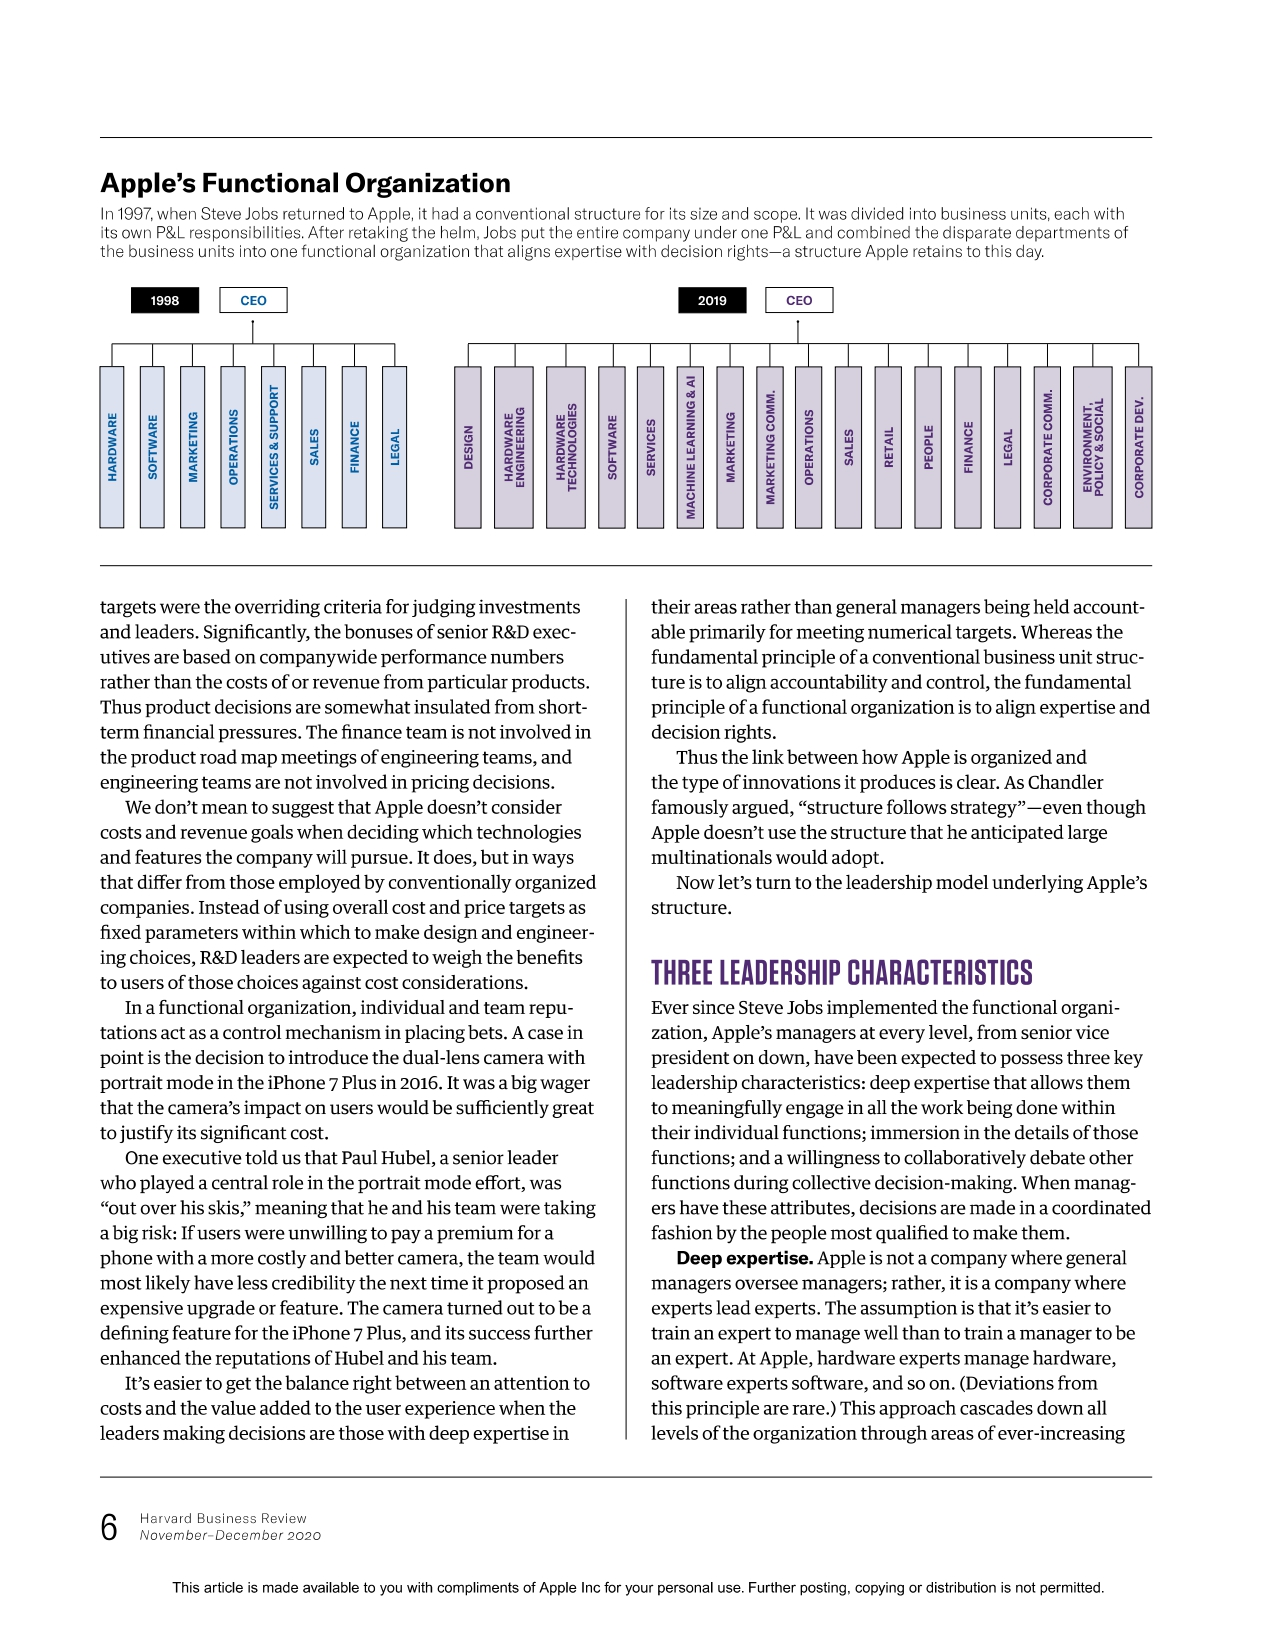

Above is the sixth page of the document.  
- It contains shapes, text, and other elements.  

Let's see how the text is extracted.

In [7]:
apple[5].page_content

'targets were the overriding criteria for judging investments \nand leaders. Significantly, the bonuses of senior R&D exec-\nutives are based on companywide performance numbers \nrather than the costs of or revenue from particular products. \nThus product decisions are somewhat insulated from short-\nterm financial pressures. The finance team is not involved in \nthe product road map meetings of engineering teams, and \nengineering teams are not involved in pricing decisions.\nWe don’t mean to suggest that Apple doesn’t consider \ncosts and revenue goals when deciding which technologies \nand features the company will pursue. It does, but in ways \nthat differ from those employed by conventionally organized \ncompanies. Instead of using overall cost and price targets as \nfixed parameters within which to make design and engineer-\ning choices, R&D leaders are expected to weigh the benefits \nto users of those choices against cost considerations.\nIn a functional organization, individua

* If we observe the text closely, the text is not extracted sequentially.  

* This is a limitation, as we are missing coherent text.



#### Checking the number of pages

In [8]:
len(apple)

11

## Data Chunking

In [9]:
text_splitter = RecursiveCharacterTextSplitter.from_tiktoken_encoder(
    encoding_name='cl100k_base',
    chunk_size=512,
    chunk_overlap= 20
)

In [10]:
document_chunks = pdf_loader.load_and_split(text_splitter)

In [11]:
len(document_chunks)

25

In [12]:
document_chunks[0].page_content

'REPRINT R2006F\nPUBLISHED IN HBR\nNOVEMBER–DECEMBER 2020\nARTICLE\nORGANIZATIONAL CULTURE\nHow Apple Is \nOrganized  \nfor Innovation\nIt’s about experts leading experts. \nby Joel M. Podolny and Morten T. Hansen\nThis article is made available to you with compliments of Apple Inc for your personal use. Further posting, copying or distribution is not permitted.'

In [13]:
document_chunks[-2].page_content

'the answer (because they don’t). This differs starkly from \nthe way leaders question subordinates about activities in the \nowning and teaching boxes.\nFinally, Rosner has delegated some areas—including \niMovie and GarageBand, in which he is not an expert—to \npeople with the requisite capabilities. For activities in the \ndelegating box, he assembles teams, agrees on objectives, \nmonitors and reviews prog\xadress, and holds the teams account-\nable: the stuff of general management.\nWhereas Apple’s VPs spend most of their time in the own-\ning and learning boxes, general managers at other companies \ntend to spend most of their time in the delegating box. Rosner \nestimates that he spends about 40% of his time on activities \nhe owns (including collaboration with others in a given area), \nabout 30% on learning, about 15% on teaching, and about 15% \non delegating. These numbers vary by manager, of course, \ndepending on their business and the needs at a given time.\nThe discretio

In [14]:
document_chunks[-1].page_content

'to cultivate the experts-leading-experts model even within \na business unit structure. For example, when filling the next \nsenior management role, pick someone with deep expertise \nin that area as opposed to someone who might make the best \ngeneral manager. But a full-fledged transformation requires \nthat leaders also transition to a functional organization. \nApple’s track rec\xadord proves that the rewards may justify the \nrisks. Its approach can produce extraordinary results.\u2002\nHBR Reprint R2006F\nJOEL M. PODOLNY is a vice president of Apple and the dean  \nof Apple University. Prior to joining Apple, in 2009, he was  \nthe dean of the Yale School of Management and on the faculty of \nHarvard’s and Stanford’s business schools. MORTEN T. HANSEN  \nis a member of Apple University’s faculty and a professor at the \nUniversity of California, Berkeley. He was formerly on the faculties  \nof Harvard Business School and INSEAD.\nFOR ARTICLE REPRINTS CALL 800-988-0886 OR 617-783

As expected, there are some overlaps:  

- The sentence '*to cultivate the experts-leading-experts model even within*' appears in both chunks.  
- If we increase the `chunk_overlap`, the overlapping length of the sentence will also increase.

## Embedding

In [15]:
embedding_model = SentenceTransformerEmbeddings(model_name='thenlper/gte-large')

/tmp/ipython-input-4198310515.py:1: LangChainDeprecationWarning: The class `HuggingFaceEmbeddings` was deprecated in LangChain 0.2.2 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-huggingface package and should be used instead. To use it run `pip install -U :class:`~langchain-huggingface` and import as `from :class:`~langchain_huggingface import HuggingFaceEmbeddings``.
  embedding_model = SentenceTransformerEmbeddings(model_name='thenlper/gte-large')
/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or dataset

modules.json:   0%|          | 0.00/385 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/57.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/619 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/670M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/191 [00:00<?, ?B/s]

In [16]:
embedding_1 = embedding_model.embed_query(document_chunks[0].page_content)
embedding_2 = embedding_model.embed_query(document_chunks[1].page_content)

In [17]:
print("Dimension of the embedding vector ",len(embedding_1))
len(embedding_1)==len(embedding_2)

Dimension of the embedding vector  1024


True

* The embedding model provides a fixed-length vector for any number of chunks.  
* This is necessary because we want to compare them for similarity.

## Vector Database

In [18]:
out_dir = 'apple_db'

if not os.path.exists(out_dir):
  os.makedirs(out_dir)

In [19]:
vectorstore = Chroma.from_documents(
    document_chunks,
    embedding_model,
    persist_directory=out_dir
)

In [20]:
vectorstore = Chroma(persist_directory=out_dir,embedding_function=embedding_model)

/tmp/ipython-input-2756559696.py:1: LangChainDeprecationWarning: The class `Chroma` was deprecated in LangChain 0.2.9 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-chroma package and should be used instead. To use it run `pip install -U :class:`~langchain-chroma` and import as `from :class:`~langchain_chroma import Chroma``.
  vectorstore = Chroma(persist_directory=out_dir,embedding_function=embedding_model)


In [21]:
vectorstore.embeddings

HuggingFaceEmbeddings(client=SentenceTransformer(
  (0): Transformer({'max_seq_length': 512, 'do_lower_case': False, 'architecture': 'BertModel'})
  (1): Pooling({'word_embedding_dimension': 1024, 'pooling_mode_cls_token': False, 'pooling_mode_mean_tokens': True, 'pooling_mode_max_tokens': False, 'pooling_mode_mean_sqrt_len_tokens': False, 'pooling_mode_weightedmean_tokens': False, 'pooling_mode_lasttoken': False, 'include_prompt': True})
  (2): Normalize()
), model_name='thenlper/gte-large', cache_folder=None, model_kwargs={}, encode_kwargs={}, multi_process=False, show_progress=False)

In [22]:
vectorstore.similarity_search("Apple Steve Jobs iPhone ",k=3)

[Document(metadata={'format': 'PDF 1.6', 'creationdate': '2020-10-05T14:18:42-04:00', 'source': '/content/HBR_How_Apple_Is_Organized_For_Innovation-4.pdf', 'trapped': '', 'subject': '', 'creationDate': "D:20201005141842-04'00'", 'encryption': 'Standard V2 R3 128-bit RC4', 'modDate': 'D:20201201183749Z', 'keywords': '', 'author': '', 'total_pages': 11, 'page': 4, 'producer': 'Adobe PDF Library 15.0 (via http://bfo.com/products/pdf?version=2.23.5-r33279)', 'file_path': '/content/HBR_How_Apple_Is_Organized_For_Innovation-4.pdf', 'creator': 'Adobe InDesign 14.0 (Macintosh)', 'moddate': '2020-12-01T18:37:49+00:00', 'title': ''}, page_content='WHY A FUNCTIONAL ORGANIZATION?\nApple’s main purpose is to create products that enrich \npeople’s daily lives. That involves not only developing \nentirely new product categories such as the iPhone and the \nApple Watch, but also continually innovating within those \ncategories. Perhaps no product feature better reflects Apple’s \ncommitment to continu

* From the retrieved chunks, we observe that all the chunks are related to the key terms [ 'Apple', 'Steve Jobs', 'iPhone' ].

## Retriever

In [23]:
retriever = vectorstore.as_retriever(
    search_type='similarity',
    search_kwargs={'k': 2}
)

In [24]:
rel_docs = retriever.get_relevant_documents("How does does Apple develop and ship products that requires good coordination between the teams?")
rel_docs

/tmp/ipython-input-3586710401.py:1: LangChainDeprecationWarning: The method `BaseRetriever.get_relevant_documents` was deprecated in langchain-core 0.1.46 and will be removed in 1.0. Use :meth:`~invoke` instead.
  rel_docs = retriever.get_relevant_documents("How does does Apple develop and ship products that requires good coordination between the teams?")


[Document(metadata={'moddate': '2020-12-01T18:37:49+00:00', 'file_path': '/content/HBR_How_Apple_Is_Organized_For_Innovation-4.pdf', 'page': 7, 'creationDate': "D:20201005141842-04'00'", 'author': '', 'producer': 'Adobe PDF Library 15.0 (via http://bfo.com/products/pdf?version=2.23.5-r33279)', 'title': '', 'format': 'PDF 1.6', 'subject': '', 'modDate': 'D:20201201183749Z', 'total_pages': 11, 'encryption': 'Standard V2 R3 128-bit RC4', 'source': '/content/HBR_How_Apple_Is_Organized_For_Innovation-4.pdf', 'creator': 'Adobe InDesign 14.0 (Macintosh)', 'creationdate': '2020-10-05T14:18:42-04:00', 'trapped': '', 'keywords': ''}, page_content='40 specialist teams: silicon design, camera software, reliabil-\nity engineering, motion sensor hardware, video engineering, \ncore motion, and camera sensor design, to name just a few. \nHow on earth does Apple develop and ship products that \nrequire such coordination? The answer is collaborative \ndebate. Because no function is responsible for a pro

- We can observe that the two relevant chunks contain the answer to the query.  
- If we increase the **`k`** value, there is a chance that we might find the answer in even more chunks.  
- This is a hyperparameter that we need to tune to get the best context.

# Defining the Response Generator

## Downloading and Loading the model

In [25]:
model_name_or_path = "TheBloke/Mistral-7B-Instruct-v0.2-GGUF"
model_basename = "mistral-7b-instruct-v0.2.Q6_K.gguf"

In [26]:
model_path = hf_hub_download(
    repo_id=model_name_or_path,
    filename=model_basename
)

mistral-7b-instruct-v0.2.Q6_K.gguf:   0%|          | 0.00/5.94G [00:00<?, ?B/s]

In [49]:
#uncomment the below snippet of code if the runtime is connected to GPU.
llm = Llama(
    model_path=model_path,
    n_ctx=5000,
    n_gpu_layers=38,
    n_batch=512
)

AVX = 1 | AVX2 = 1 | AVX512 = 0 | AVX512_VBMI = 0 | AVX512_VNNI = 0 | FMA = 1 | NEON = 0 | ARM_FMA = 0 | F16C = 1 | FP16_VA = 0 | WASM_SIMD = 0 | BLAS = 1 | SSE3 = 1 | SSSE3 = 1 | VSX = 0 | 


In [28]:
#uncomment the below snippet of code if the runtime is connected to CPU only.
#llm = Llama(
#    model_path=model_path,
#    n_ctx=1024,
#    n_cores=-2
#)

In [50]:
llm("How does does Apple develop and ship products that requires good coordination between the teams?")['choices'][0]['text']

"\n\nApple is known for its ability to develop and ship complex products with high levels of quality, design, and user experience. This achievement can be attributed to several factors:\n\n1. Strong Leadership: Apple has strong leaders at the helm who have a clear vision for the company's products and services. Steve Jobs, who co-founded Apple, was a master strategist and product designer who had a deep understanding of user needs and market trends. Tim Cook, who took over as CEO after Jobs passed away, has continued this legacy by focusing on innovation and design while also maintaining a strong focus on"

- The response seems generic and appears to be derived from another article. Let's provide our own context and align the response with our needs.

## System and User Prompt Template

Prompts guide the model to generate accurate responses. Here, we define two parts:

    1. The system message describing the assistant's role.
    2. A user message template including context and the question.

In [51]:
qna_system_message = """
You are an assistant whose work is to review the report and provide the appropriate answers from the context.
User input will have the context required by you to answer user questions.
This context will begin with the token: ###Context.
The context contains references to specific portions of a document relevant to the user query.

User questions will begin with the token: ###Question.

Please answer only using the context provided in the input. Do not mention anything about the context in your final answer.

If the answer is not found in the context, respond "I don't know".
"""

In [52]:
qna_user_message_template = """
###Context
Here are some documents that are relevant to the question mentioned below.
{context}

###Question
{question}
"""

## Response Function

In [53]:
def generate_rag_response(user_input,k=3,max_tokens=128,temperature=0,top_p=0.95,top_k=50):
    global qna_system_message,qna_user_message_template
    # Retrieve relevant document chunks
    relevant_document_chunks = retriever.get_relevant_documents(query=user_input,k=k)
    context_list = [d.page_content for d in relevant_document_chunks]

    # Combine document chunks into a single context
    context_for_query = ". ".join(context_list)

    user_message = qna_user_message_template.replace('{context}', context_for_query)
    user_message = user_message.replace('{question}', user_input)

    prompt = qna_system_message + '\n' + user_message

    # Generate the response
    try:
        response = llm(
                  prompt=prompt,
                  max_tokens=max_tokens,
                  temperature=temperature,
                  top_p=top_p,
                  top_k=top_k
                  )

        # Extract and print the model's response
        response = response['choices'][0]['text'].strip()
    except Exception as e:
        response = f'Sorry, I encountered the following error: \n {e}'

    return response

# Question Answering using RAG

### Query 1: Who are the authors of this article and who published this article ?

In [54]:
user_input = "Who are the authors of this article and who published this article ?"
print(generate_rag_response(user_input))

Llama.generate: prefix-match hit


Answer:
Morten T. Hansen and Joel M. Podolny authored this article and Harvard Business Review published it.


- The answer is clear, concise, and focused, without any unnecessary information.  

- For queries like this, we expect a response of this nature.

### Query 2: List down the three leadership characteristics in bulleted points and explain each one of the characteristics under two lines.

In [55]:
user_input_2 = "List down the three leadership characteristics in bulleted points and explain each one of the characteristics under two lines."
generate_rag_response(user_input_2)

Llama.generate: prefix-match hit


"- Deep expertise: Apple's managers are expected to possess deep expertise that allows them to meaningfully engage in all the work being done within their individual functions. The assumption is that it's easier to train an expert to manage well than to train a manager to be an expert. At Apple, hardware experts manage hardware, software experts software, and so on.\n- Immersion in the details: Leaders should know the details of their organization three levels down for speedy and effective cross-functional decision-making at the highest levels. If managers attend a decision-making meeting without the details at their disposal, the"

- The response contains only two leadership characteristics, but they are well explained.  
- Perhaps if we increase the **`max_tokens`**, we might get the third characteristic as well (assuming it is in the document).

### Query 3: Can you explain specific examples from the article where Apple's approach to leadership has led to successful innovations?

In [56]:
user_input_3 = "Can you explain specific examples from the article where Apple's approach to leadership has led to successful innovations?"
generate_rag_response(user_input_3)

Llama.generate: prefix-match hit


"I don't know. The context does mention that Apple's functional organization and leadership model have played a crucial role in the company's innovation success, but it doesn't provide specific examples of how this has manifested in successful innovations."

- If we look at the system prompt, we explicitly mentioned that the query should not be answered if it cannot be derived from the context.  

- As expected, the model has done its job well. It has eliminated hallucination.

## Fine-tuning Parameters

### Query 1: Who are the authors of this article and who published this article ?

In [57]:
user_input = "Who are the authors of this article and who published this article ?"
generate_rag_response(user_input, max_tokens=100)

Llama.generate: prefix-match hit


'Answer:\nMorten T. Hansen and Joel M. Podolny authored this article and Harvard Business Review published it.'

- Even if the **`max_tokens`** is set to 100, the model still didn't generate that many, as the query could be answered with a limited number of tokens.  

- One of the reasons could be that the temperature is set to 0, making the model more deterministic and less creative.

### Query 2: List down the three leadership characteristics in bulleted points and explain each one of the characteristics under two lines.

In [58]:
user_input_2 = "List down the three leadership characteristics in bulleted points and explain each one of the characteristics under two lines."
generate_rag_response(user_input_2, temperature=0.1, max_tokens=350)

Llama.generate: prefix-match hit


"- Deep expertise: Apple's managers at every level are expected to possess deep expertise that allows them to meaningfully engage in all the work being done within their individual functions. The assumption is that it’s easier to train an expert to manage well than to train a manager to be an expert. At Apple, hardware experts manage hardware, software experts software, and so on.\n- Immersion in the details: Leaders should know the details of their organization three levels down for speedy and effective cross-functional decision-making at the highest levels. If managers attend a decision-making meeting without the details at their disposal, the decision must either be made without the details or postponed. Apple's leaders pay extreme attention to the exact shape of products’ rounded corners, demanding extremely precise manufacturing tolerances to produce millions of iPhones and other products with continuous curves."

- If we compare it to the previous case, after increasing the **`max_tokens`**, we got the third characteristic

### Query 3: Can you explain specific examples from the article where Apple's approach to leadership has led to successful innovations?

In [59]:
user_input_3 = "Can you explain specific examples from the article where Apple's approach to leadership has led to successful innovations?"
generate_rag_response(user_input_3, top_p=0.98, top_k=20, max_tokens=256)

Llama.generate: prefix-match hit


"I don't know. The context does mention that Apple's functional organization and leadership model have played a crucial role in the company's innovation success, but it doesn't provide specific examples of how this has manifested in successful innovations."

- Since the context provided doesn't help with the query, the model has responded correctly based on the prompt design.  

- However, there is a chance that it might not be present in the top **`k`** context. Therefore, it is better to experiment with higher values of **`k`** and check.

# Output Evaluation

Let us now use the LLM-as-a-judge method to check the quality of the RAG system on two parameters - retrieval and generation. We illustrate this evaluation based on the answeres generated to the question from the previous section.

- We are using the same Mistral model for evaluation, so basically here the llm is rating itself on how well he has performed in the task.

### Defining the Evaluation Prompts

In [60]:
groundedness_rater_system_message = """
You are tasked with rating AI generated answers to questions posed by users.
You will be presented a question, context used by the AI system to generate the answer and an AI generated answer to the question.
In the input, the question will begin with ###Question, the context will begin with ###Context while the AI generated answer will begin with ###Answer.

Evaluation criteria:
The task is to judge the extent to which the metric is followed by the answer.
1 - The metric is not followed at all
2 - The metric is followed only to a limited extent
3 - The metric is followed to a good extent
4 - The metric is followed mostly
5 - The metric is followed completely

Metric:
The answer should be derived only from the information presented in the context

Instructions:
1. First write down the steps that are needed to evaluate the answer as per the metric.
2. Give a step-by-step explanation if the answer adheres to the metric considering the question and context as the input.
3. Next, evaluate the extent to which the metric is followed.
4. Use the previous information to rate the answer using the evaluaton criteria and assign a score.
"""

In [61]:
relevance_rater_system_message = """
You are tasked with rating AI generated answers to questions posed by users.
You will be presented a question, context used by the AI system to generate the answer and an AI generated answer to the question.
In the input, the question will begin with ###Question, the context will begin with ###Context while the AI generated answer will begin with ###Answer.

Evaluation criteria:
The task is to judge the extent to which the metric is followed by the answer.
1 - The metric is not followed at all
2 - The metric is followed only to a limited extent
3 - The metric is followed to a good extent
4 - The metric is followed mostly
5 - The metric is followed completely

Metric:
Relevance measures how well the answer addresses the main aspects of the question, based on the context.
Consider whether all and only the important aspects are contained in the answer when evaluating relevance.

Instructions:
1. First write down the steps that are needed to evaluate the context as per the metric.
2. Give a step-by-step explanation if the context adheres to the metric considering the question as the input.
3. Next, evaluate the extent to which the metric is followed.
4. Use the previous information to rate the context using the evaluaton criteria and assign a score.
"""

In [62]:
user_message_template = """
###Question
{question}

###Context
{context}

###Answer
{answer}
"""

### Defining the Evaluation Function

In [63]:
def generate_ground_relevance_response(user_input,k=3,max_tokens=1024,temperature=0,top_p=0.95,top_k=50):
    global qna_system_message,qna_user_message_template
    # Retrieve relevant document chunks
    relevant_document_chunks = retriever.get_relevant_documents(query=user_input,k=3)
    context_list = [d.page_content for d in relevant_document_chunks]
    context_for_query = ". ".join(context_list)

    # Combine user_prompt and system_message to create the prompt
    prompt = f"""[INST]{qna_system_message}\n
                {'user'}: {qna_user_message_template.format(context=context_for_query, question=user_input)}
                [/INST]"""

    response = llm(
            prompt=prompt,
            max_tokens=max_tokens,
            temperature=temperature,
            top_p=top_p,
            top_k=top_k,
            stop=['INST'],
            )

    answer =  response["choices"][0]["text"]
    # Combine user_prompt and system_message to create the prompt
    groundedness_prompt = f"""[INST]{groundedness_rater_system_message}\n
                {'user'}: {user_message_template.format(context=context_for_query, question=user_input, answer=answer)}
                [/INST]"""

    # Combine user_prompt and system_message to create the prompt
    relevance_prompt = f"""[INST]{relevance_rater_system_message}\n
                {'user'}: {user_message_template.format(context=context_for_query, question=user_input, answer=answer)}
                [/INST]"""

    response_1 = llm(
            prompt=groundedness_prompt,
            max_tokens=max_tokens,
            temperature=temperature,
            top_p=top_p,
            top_k=top_k,
            stop=['INST'],
            )

    response_2 = llm(
            prompt=relevance_prompt,
            max_tokens=max_tokens,
            temperature=temperature,
            top_p=top_p,
            top_k=top_k,
            stop=['INST'],
            )

    return response_1['choices'][0]['text'],response_2['choices'][0]['text']

### Query 1: Who are the authors of this article and who published this article ?

In [64]:
user_input = "Who are the authors of this article and who published this article?"
ground,rel = generate_ground_relevance_response(user_input,max_tokens=350)

print(ground,end="\n\n")
print(rel)

Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit


 Steps to evaluate the answer:
1. Identify the key information in the context related to the question.
2. Check if the authors and publisher mentioned in the context are included in the AI generated answer.
3. Verify that the answer is derived only from the information presented in the context and not from any external sources or assumptions.

Explanation:
The AI generated answer correctly identifies Morten T. Hansen and Joel M. Podolny as the authors of the article and Harvard Business Review as the publisher, based on the information provided in the context. Therefore, the answer is derived only from the context and does not include any external sources or assumptions.

Evaluation:
The metric is followed completely. The AI generated answer includes all the necessary information from the context and nothing more.

Rating:
Based on the evaluation criteria, I would rate the answer as a 5, indicating that the metric is followed completely.

 Steps to evaluate the context as per the relev

- It got a perfect score because the response is both grounded in the context and relevant to the query.  
- This means that both the retrieval and augmentation parts are good.

### Query 2: List down the three leadership characteristics in bulleted points and explain each one of the characteristics under two lines.

In [65]:
user_input_2 = "List down the three leadership characteristics in bulleted points and explain each one of the characteristics under two lines."
ground,rel = generate_ground_relevance_response(user_input_2,max_tokens=1024)

print(ground,end="\n\n")
print(rel)

Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit


 Steps to evaluate the answer:
1. Identify the three leadership characteristics mentioned in the context.
2. Check if each bullet point in the answer is derived directly from the information presented in the context.
3. Verify that the explanation under each bullet point adheres to the information provided in the context.

The answer adheres to the metric as it lists and explains each of the three leadership characteristics mentioned in the context, using information directly from the text. The first bullet point "Deep expertise: Apple's managers are expected to possess deep expertise in their individual functions" is derived from the context where it states "Apple’s managers at every level, from senior vice president on down, have been expected to possess three key leadership characteristics: deep expertise that allows them to meaningfully engage in all the work being done within their individual functions; immersion in the details of those functions; and a willingness to collaborativ

- The groundedness score is 5 since the response is derived solely from the context.

- The relevance score is 5 as the metric is fully followed, but the justification could be clearer.

- One solution is to adjust the relevance prompt to require a brief explanation for the score given.

### Query 3: Can you explain specific examples from the article where Apple's approach to leadership has led to successful innovations?

In [68]:
user_input_3 = "Can you explain specific examples from the article where Apple's approach to leadership has led to successful innovations?"
ground,rel = generate_ground_relevance_response(user_input_3,max_tokens=500)

print(ground,end="\n\n")
print(rel)

Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit


 Steps to evaluate the answer:
1. Identify the specific examples mentioned in the context related to Apple's approach to leadership and successful innovations.
2. Determine if the AI generated answer is derived only from the information presented in the context.

Evaluation:
The AI generated answer adheres to the metric as it mentions the specific example of the iPhone's development under Apple's functional organization and the evolution of the leadership approach that contributed to its success. The answer is directly derived from the context provided.

Rating:
Based on the evaluation criteria, I would rate this answer as a 5 - The metric is followed completely. The AI generated answer is fully derived from the information presented in the context and provides a specific example of how Apple's approach to leadership has led to successful innovations.

 Steps to evaluate context as per the metric:
1. Identify the main aspects of the question which are specific examples from the article

- For relevance, the score is clearly stated (5) with a reason,the response follows the metric completely but could improve by adding more examples beyond the iPhone to strengthen completeness.

- For groundedness, the reasoning for any point deduction is unclear, as the answer appears fully derived from the context without missing information.

# Business Insights and Recommendations

- Vector database creation time increases with the number of pages in the PDF document.
- Retrieval parameter **`k`** is critical as the answer can be spread across multiple contexts.
- **`chunk_overlap`** ensures coherence, especially when context spans across chunks.
- **`max_tokens`** depends on query complexity; higher values yield detailed responses, while simple queries result in concise outputs despite large token limits due to prompt design and zero **`temperature`**.
- Refine prompt design and temperature settings to control response length and creativity.
- Continuously adjust RAG parameters based on specific use cases for optimal performance.
- Prioritize groundedness and relevance in evaluations to ensure reliable and contextually accurate outputs.
- Establish a feedback loop to fine-tune parameters, improving performance for diverse query types.

<font size=6 color='blue'>Power Ahead</font>
___